# Chapter: Vibration-based Condition Monitoring: Fault Detection & Diagnosis


# Topic: Fault Classification for CWRU Motor Dataset using SVM

The code below has been adapted from the work (Copyright (c) 2022 Biswajit Sahoo) of Biswajit Sahoo (https://github.com/biswajitsahoo1111/cbm_codes_open) which is shared under MIT License (https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/LICENSE.md)

'''
MIT License
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
'''

In [1]:
# packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# read feature matrix
featureData = pd.read_csv('feature_timeDomain_48k_2048_load_1HP.csv')
print(featureData.head())
featureData['faultType'] = pd.Categorical(featureData['faultType']) #designates last column as categorical variable

   peak2peak     peak      mean       Std       RMS  skewness  kurtosis  \
0    0.77876  0.35986  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1    0.82883  0.46772  0.022255  0.132488  0.134312  0.174699 -0.081548   
2    0.90664  0.46855  0.020470  0.149651  0.151008  0.040339 -0.274069   
3    1.12778  0.58475  0.020960  0.157067  0.158422 -0.023266  0.134692   
4    1.02576  0.44685  0.022167  0.138189  0.139922 -0.081534  0.402783   

   CrestFactor  ShapeFactor   faultType  
0     2.901946     6.950855  Ball_007_1  
1     3.482334     6.035202  Ball_007_1  
2     3.102819     7.376926  Ball_007_1  
3     3.691097     7.558387  Ball_007_1  
4     3.193561     6.312085  Ball_007_1  


In [5]:
# generate training and test datasets
train_data, test_data = train_test_split(featureData, test_size = 750, stratify = featureData['faultType'], random_state = 1234)
print('Training data')
print(train_data['faultType'].value_counts())
print('---------')
print('Test data')
print(test_data['faultType'].value_counts())

Training data
Ball_007_1    155
Ball_014_1    155
Ball_021_1    155
IR_007_1      155
IR_014_1      155
IR_021_1      155
Normal_1      155
OR_007_6_1    155
OR_014_6_1    155
OR_021_6_1    155
Name: faultType, dtype: int64
---------
Test data
Ball_007_1    75
Ball_014_1    75
Ball_021_1    75
IR_007_1      75
IR_014_1      75
IR_021_1      75
Normal_1      75
OR_007_6_1    75
OR_014_6_1    75
OR_021_6_1    75
Name: faultType, dtype: int64


In [6]:
# scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
test_data_scaled = scaler.transform(test_data.iloc[:,:-1])

In [7]:
# find best SVM hyperparameters via grid-search
hyperParameters = {'C':[0.1, 1, 10, 50, 100, 300], 'gamma':[0.01, 0.05, 0.1, 0.5, 1, 10]}
svm_clf = GridSearchCV(SVC(), hyperParameters, cv= 5)
svm_clf.fit(train_data_scaled, train_data['faultType'])
print(svm_clf.best_params_)

{'C': 50, 'gamma': 0.1}


In [8]:
# predict fault classes
train_pred = svm_clf.predict(train_data_scaled)
test_pred = svm_clf.predict(test_data_scaled)

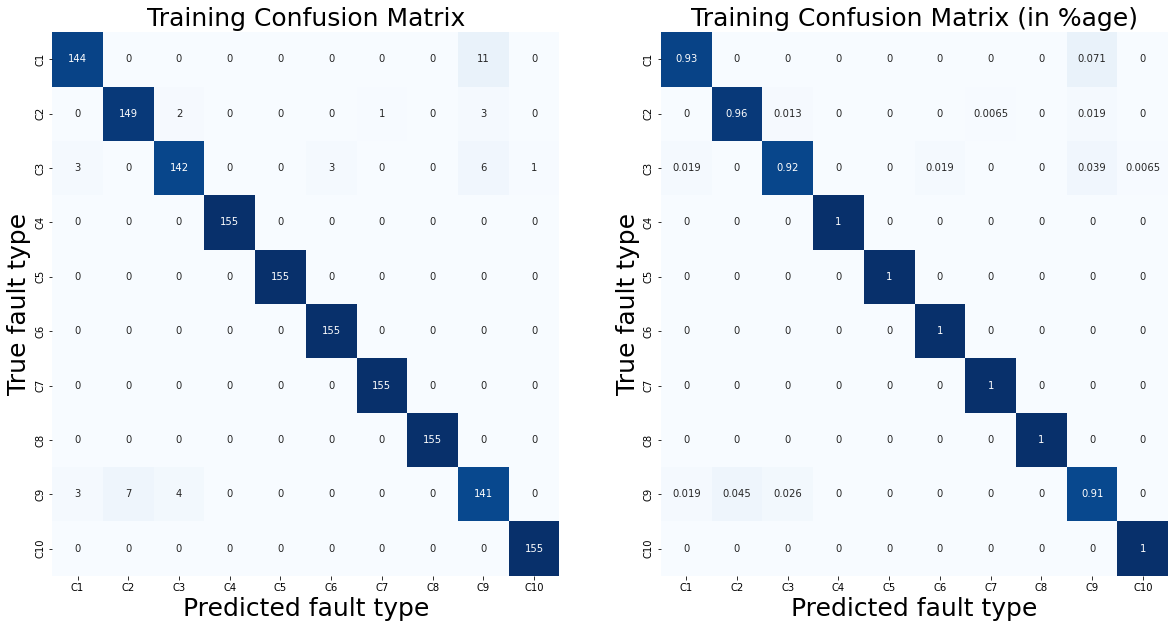

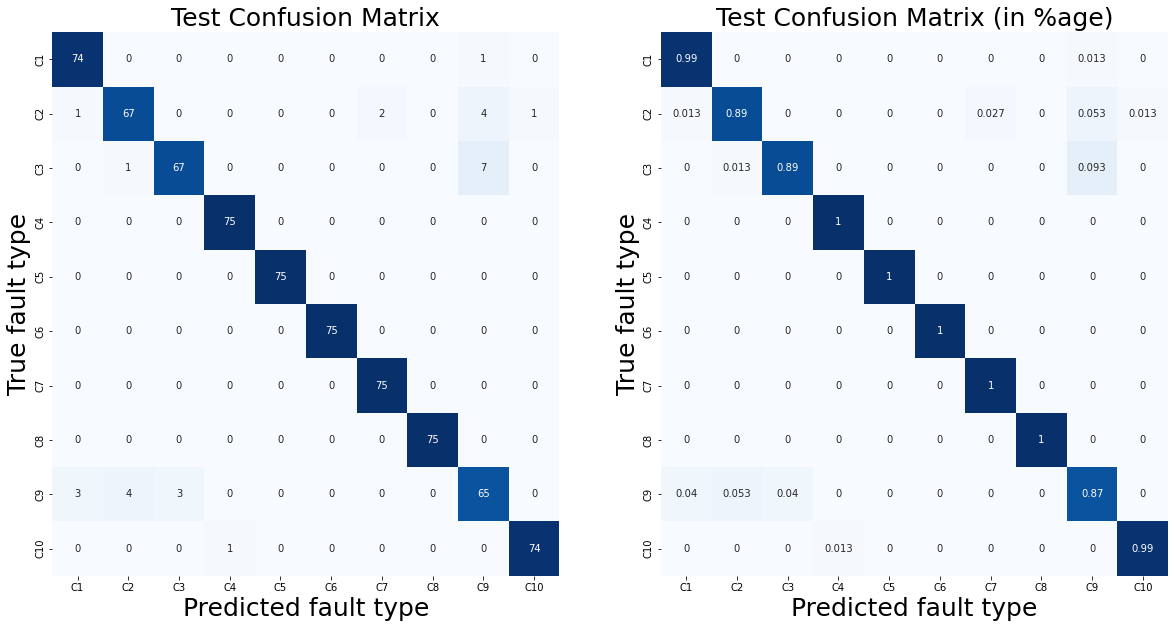

In [9]:
# generate confusion matrices
CM_train = confusion_matrix(train_data['faultType'], train_pred)
CM_test = confusion_matrix(test_data['faultType'], test_pred) 

fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'] # small labels for each fault type
plt.figure(1,figsize=(20,10))
plt.subplot(121)
sns.heatmap(CM_train, annot= True, fmt = "d", xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix', fontsize=25)
plt.xlabel('Predicted fault type', fontsize=25)
plt.ylabel('True fault type', fontsize=25)

plt.subplot(122)
sns.heatmap(CM_train/155, annot= True, xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
# 155 is the number of samples for each fault type in training dataset 
plt.title('Training Confusion Matrix (in %age)', fontsize=25)
plt.xlabel('Predicted fault type', fontsize=25)
plt.ylabel('True fault type', fontsize=25)
plt.show()

plt.figure(2,figsize=(20,10))
plt.subplot(121)
sns.heatmap(CM_test, annot = True, xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix', fontsize=25)
plt.xlabel('Predicted fault type', fontsize=25)
plt.ylabel('True fault type', fontsize=25)

plt.subplot(122)
sns.heatmap(CM_test/75, annot = True, xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)', fontsize=25)
plt.xlabel('Predicted fault type', fontsize=25)
plt.ylabel('True fault type', fontsize=25)
plt.show()
